#   Diamond Price Predicition
<img src="bla.jpeg" width = "800" align = "center">

In [75]:
#Importing libraries
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm  #OLS

import warnings 
warnings.filterwarnings('ignore')

## Data pre-processing

In [29]:
od  =pd.read_csv("A:\Capstone\data.csv")
od.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
1,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
2,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
4,20,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66


In [30]:
od.shape

(53943, 11)

In [31]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [32]:
od.duplicated().sum()

0

#### Inference:
1)It's a Regression problem.<br>
2)Data is already in a readable format.<br>
3)Data has shape of 53943*11.<br>
4)Target Variable is price.<br>
5)Data Contatins a Non required column:Unnamed Column.<br>
6)Data has no duplicates and no null values.<br>
7)Data has No. of Categorical Columns = 3 and Numerical Columns = 8.

In [33]:
od.drop(columns =["Unnamed: 0"],inplace =True)


In [34]:
cat_cols = od.select_dtypes(include = 'object').columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [35]:
num_cols = od.select_dtypes(exclude = 'object').columns
num_cols

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [36]:
od.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
1,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
2,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
3,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
4,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66


## EDA

### 1.Univariate Analysis

#### 1. Cat_Col's

Ideal        0.399514
Premium      0.255696
Very Good    0.223996
Good         0.090948
Fair         0.029846
Name: cut, dtype: float64 

G    0.209332
E    0.181655
F    0.176909
H    0.153940
D    0.125596
I    0.100514
J    0.052055
Name: color, dtype: float64 

SI1     0.242237
VS2     0.227258
SI2     0.170439
VS1     0.151475
VVS2    0.093914
VVS1    0.067757
IF      0.033183
I1      0.013737
Name: clarity, dtype: float64 

Frequency Distributuion of categories:


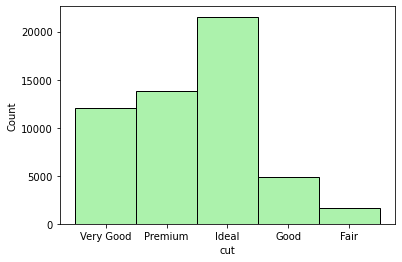

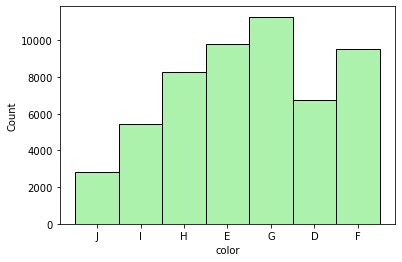

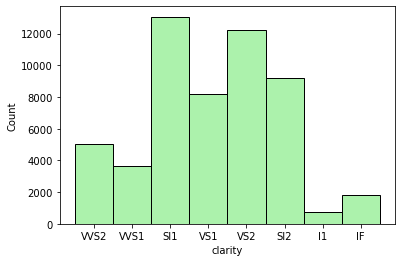

In [37]:
for i in cat_cols:
    print(od[i].value_counts(normalize = True),"\n")
print("Frequency Distributuion of categories:")
for i in cat_cols:
    sns.histplot(x = od[i],color = "lightgreen")
    plt.show()

#### Inference:
1) The Diamonds of "idle" cut are most in number while diamonds of "fair" cut are least.<br>
2) The color quality "G" and "E" are most in number even though being of inferior quality.However, the "D" color category being the premium quality isn't even in top 3 of color wise diamond distribution.<br>
3) The "IF" clarity which is the best and "l1" category which is worst are very less in number and rest distribution is mostly of inbetween clarities. 

#### 1.2 Numeric Columns

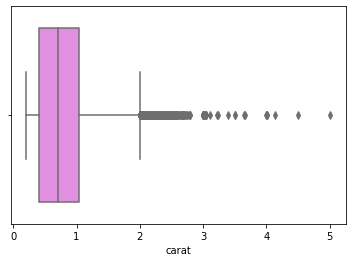

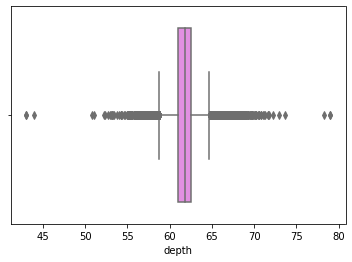

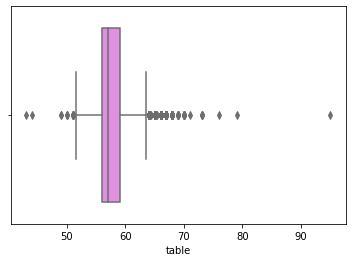

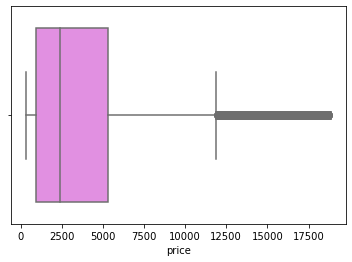

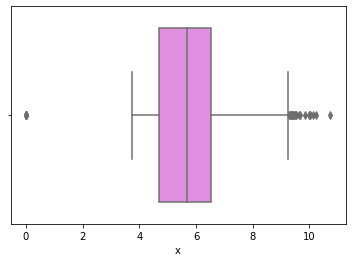

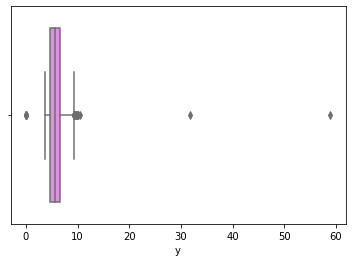

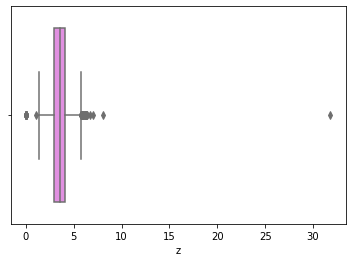

In [38]:
for n in num_cols:
    sns.boxplot(x=od[n],color = "violet")
    plt.show()

#### Inference:
1) Data has Outliers in :<br>
    upper limit:<br>
        carat,depth,table,price,x,y,z<br>
    lower limit:<br>
        depth,table,x,y,z

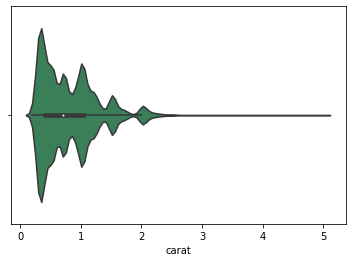

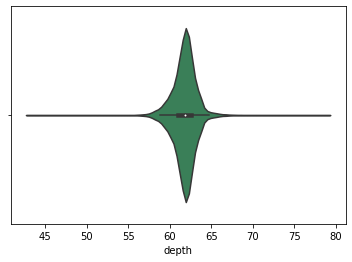

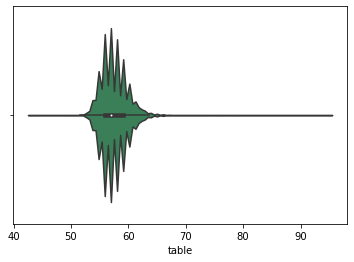

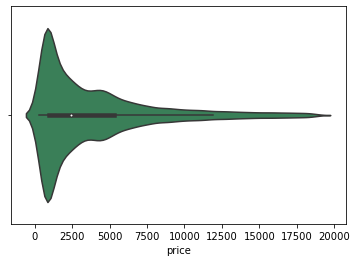

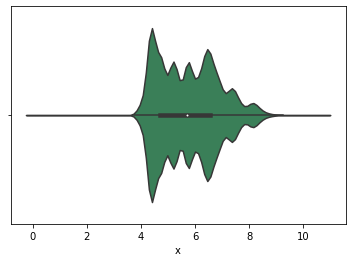

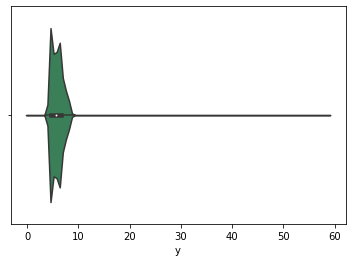

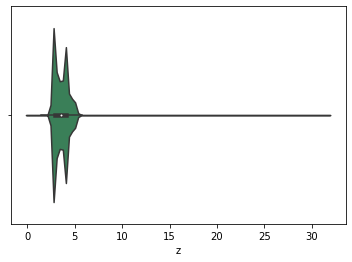

In [39]:
for i in num_cols:
    sns.violinplot(x=od[i],color = 'seagreen')
    plt.show()

#### Statistical Analysis

In [40]:
od.describe(percentiles=[0.01,0.02,0.03,0.05,0.1,0.25,0.4,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,40%,50%,75%,95%,96%,97%,98%,99%,max
carat,53943.0,0.797935,0.473999,0.2,0.24,0.27,0.30,0.30,0.31,0.40,0.53,0.70,1.04,1.70,1.98,2.01,2.04,2.18,5.01
depth,53943.0,61.749322,1.432626,43.0,57.90,58.40,58.80,59.30,60.00,61.00,61.60,61.80,62.50,63.80,63.90,64.20,64.70,65.60,79.00
table,53943.0,57.457251,2.234549,43.0,53.00,54.00,54.00,54.00,55.00,56.00,57.00,57.00,59.00,61.00,62.00,62.00,63.00,64.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,429.00,463.00,491.00,544.00,646.00,950.00,1698.00,2401.00,5324.00,13106.70,14014.96,15072.74,16170.16,17378.16,18823.00
x,53943.0,5.731158,1.121730,0.0,4.02,4.14,4.24,4.29,4.36,4.71,5.23,5.70,6.54,7.66,7.88,8.07,8.18,8.36,10.74
y,53943.0,5.734526,1.142103,0.0,4.04,4.16,4.25,4.30,4.36,4.72,5.24,5.71,6.54,7.65,7.85,8.05,8.17,8.34,58.90
z,53943.0,3.538730,0.705679,0.0,2.48,2.55,2.61,2.65,2.69,2.91,3.22,3.53,4.04,4.73,4.85,4.98,5.05,5.15,31.80


#### Inference from violin plot and Description:
1) Carat Column ranges from 0.2 to 5.01 and has major distribution of data in range of 0.2-0.5 which is close to 40% of data.<br>
2) The depth of diamonds ranges from 43-79 and has major distribution from 62 to 64.<br>
3) The table (Top Face) of diamonds ranges between  42-95 with highest distributon somewhere near 57.<br>
4) The price of diamonds goes upto 18,823 with major price distribution of Diamonds within 2500 which is close to 52% of data.<br>
5) The x dimension ranges from 0 to 10.74 and for most Diamonds ranges from 4.3 to 6.3.<br>
6) The y Dimension ranges from 0 to 58.90 and for most Diamonds ranges from 5 to 7.<br>
7) The z Dimension ranges from 0 to 31.80 and for most Diamonds ranges from 3 to 5.<br>

#### Inference-2:
-> The standard deviation of input columns isn't high which means that the data points are close to average and imply data is reliable.<br>


-> Now in the distribution of Dimensions we noticed that their minimum value is 0 which means there are data records with either no dimension or 2 dimensions which can't be possible so they are faulty records and we will treat them while preparing data for model development.

-> The Outliers we infered from boxplot can be validated from description of columns.


#### 1.3.Target Variable

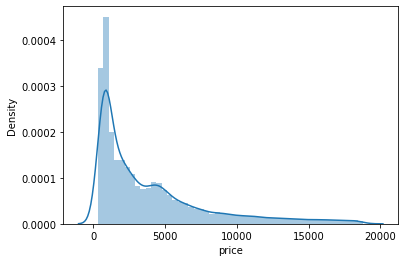

In [41]:
sns.distplot(od["price"])
plt.show()

#### Inference:
1) The target variable is Right Skewed.

### 2.Bi-variate Analysis

#### 2.1.Cat_Num

cut  V/S Price


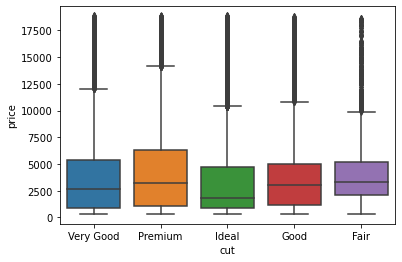

color  V/S Price


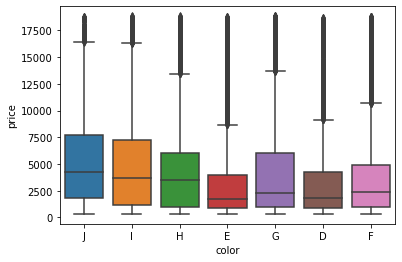

clarity  V/S Price


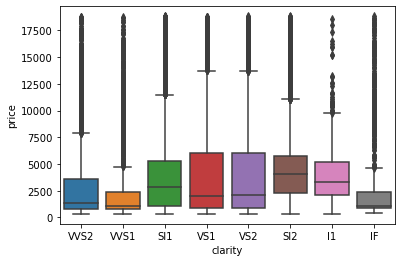

In [42]:
for i in cat_cols:
    print(i," V/S Price")
    sns.boxplot(x=od[i],y=od["price"])    #barplot,violinplot
    plt.show()

#### Inference:
1) The IQR as well as price range of "premium" cut is highest then all the other categories of Cut Column.<br>
2) The IQR and price range of "j" color category is very high whereas Thw IQR and price range of "D" color ctegory is very low although its the best color of diamonds.<br>
3) The IQR and price range of "IF" clarity is very low compared to other cateogries of clarity which are inferior to it.

###### Outlier Detection:
->Columns contain outliers with price in upper limit

#### 2.2 Cat_to_Cat [of input feature]

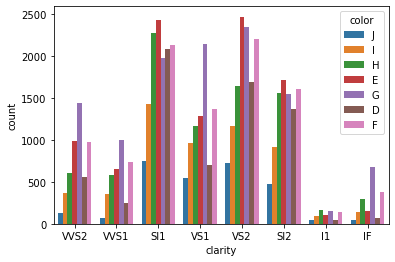

In [43]:
sns.countplot(x=od["clarity"],hue = od['color'])
plt.show()

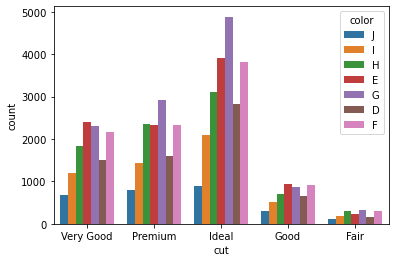

In [44]:
sns.countplot(x=od["cut"],hue = od['color'])
plt.show()

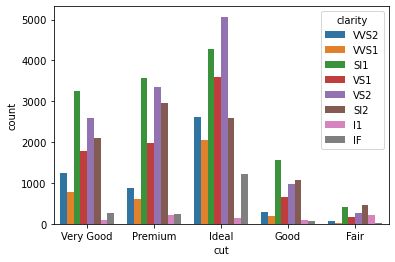

In [45]:
sns.countplot(x=od["cut"],hue = od['clarity'])
plt.show()

In [46]:
# Chi Square Test

# Null Hypo (Ho) : features are independent
# Alter Hypo(Ha) : features  are associated
# CI - 95% 
#Alpha=.05
# Decision Rule :
#     if p value >= Alpha , Accept Null hypo
#     If p value < Alpha , Reject Null Hyp - Accept alternative Hypothesis

In [47]:
from scipy import stats

In [48]:
ct = pd.crosstab(od["clarity"],od['color'])
stats.chi2_contingency(ct)

(2047.1940345632397,
 0.0,
 42,
 array([[  93.0662922 ,  134.60613981,  131.08953896,  155.1150659 ,
          114.06974028,   74.4805072 ,   38.57271564],
        [ 224.81600949,  325.16193019,  316.66703743,  374.70441021,
          275.55308381,  179.91917394,   93.17835493],
        [1641.15686929, 2373.68209035, 2311.66937323, 2735.34219454,
         2011.53751182, 1313.40996978,  680.20199099],
        [1154.72535825, 1670.13340007, 1626.50097325, 1924.5990768 ,
         1415.326845  ,  924.12116493,  478.59318169],
        [1026.24112489, 1484.30063215, 1445.52310772, 1710.45236639,
         1257.8459485 ,  821.29584932,  425.34097102],
        [1539.67567618, 2226.905085  , 2168.72693399, 2566.20187976,
         1887.15377343, 1232.19505775,  638.1415939 ],
        [ 459.05168419,  663.94796359,  646.60224682,  765.10872588,
          562.65168789,  367.37686076,  190.26083088],
        [ 636.26698552,  920.26275884,  896.22078861, 1060.47628052,
          779.86140927,  509.20

In [49]:
ct = pd.crosstab(od["cut"],od['color'])
stats.chi2_contingency(ct)

(310.27589659903754,
 1.4220047955560973e-51,
 24,
 array([[ 202.20881301,  292.46408246,  284.82342473,  337.02463712,
          247.84383516,  161.82674304,   83.80846449],
        [ 616.17169976,  891.1980053 ,  867.9153551 , 1026.98314888,
          755.23096602,  493.11925551,  255.38156943],
        [2706.70939696, 3914.84064661, 3812.56498526, 4511.31549969,
         3317.56676492, 2166.16654617, 1121.83616039],
        [1732.33922844, 2505.56340952, 2440.10527779, 2887.31727935,
         2123.29814805, 1386.38277441,  717.99388243],
        [1517.57086184, 2194.93385611, 2137.59095712, 2529.35943496,
         1860.06028586, 1214.50468087,  628.97992325]]))

In [50]:
ct = pd.crosstab(od["clarity"],od['cut'])
stats.chi2_contingency(ct)

(4391.66223816779,
 0.0,
 28,
 array([[  22.11612257,   67.3923586 ,  296.04009788,  189.47060786,
          165.98081308],
        [  53.42491148,  162.79665573,  715.13060082,  457.69553047,
          400.9523015 ],
        [ 390.00185381, 1188.41558682, 5220.45338598, 3341.17737241,
         2926.95180098],
        [ 274.4070593 ,  836.17455462, 3673.13449382, 2350.86743414,
         2059.41645811],
        [ 243.8742747 ,  743.13490166, 3264.43136273, 2089.29060304,
         1830.26885787],
        [ 365.88602784, 1114.92972211, 4897.64582986, 3134.57514413,
         2745.96327605],
        [ 109.08829691,  332.41440039, 1460.2247743 ,  934.56824797,
          818.70428044],
        [ 151.20145339,  460.74182007, 2023.93945461, 1295.35505997,
         1134.76221196]]))

#### Inference of chi-Square Test:
->All the categorical features are indipendent of eachother

#### 2.3 Num_Num

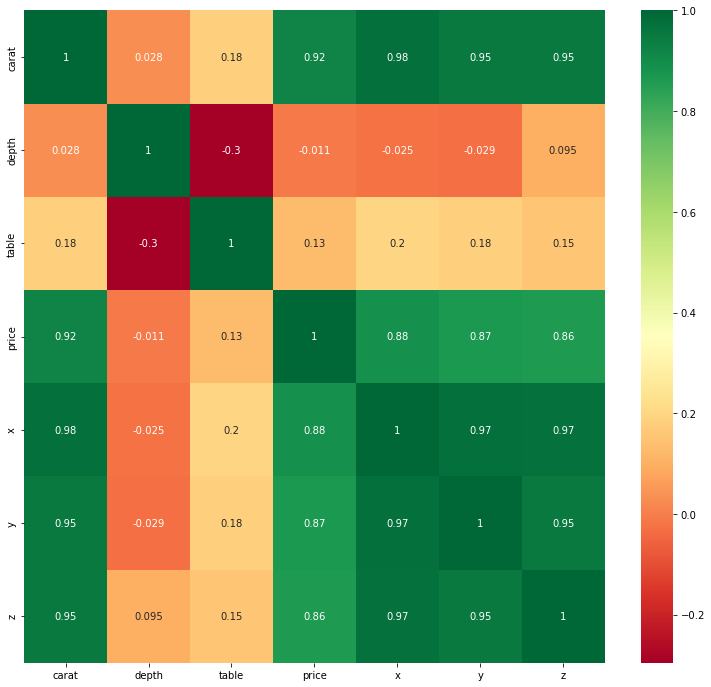

In [51]:
plt.figure(figsize = (13,12))
corr = od.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

#### Inference:
1)carat column has high correlation with target variable(price) and dimensions of diamond.<br>
2)Dimensions has high corrlation with target variable and with each other as well.

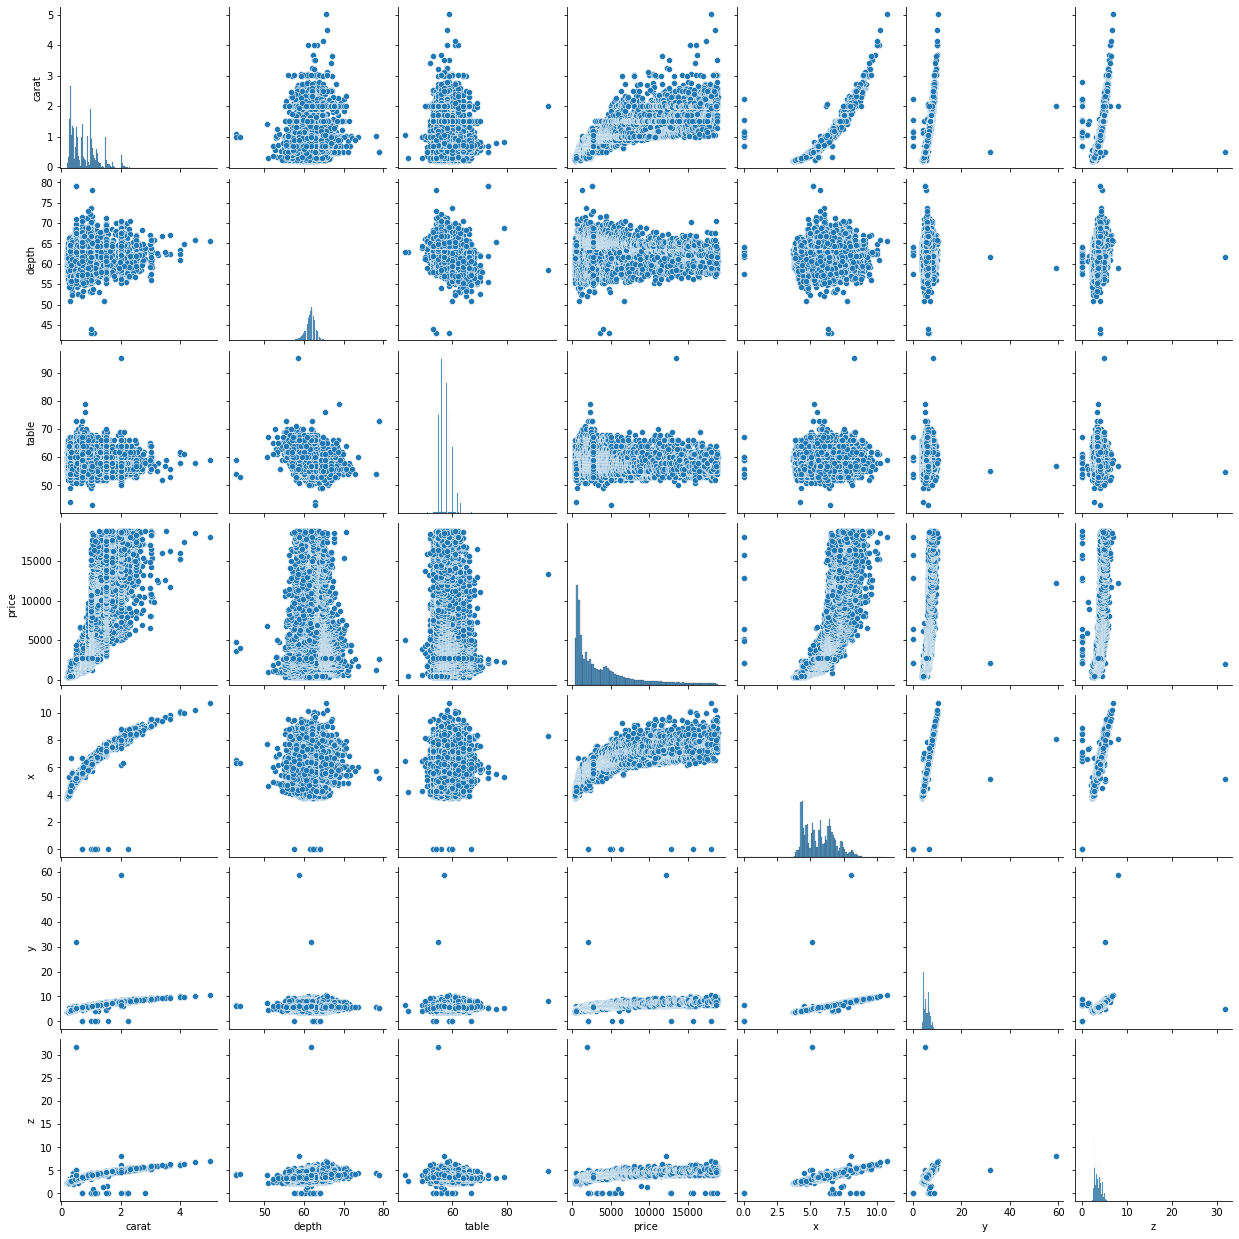

In [52]:
sns.pairplot(data=od,vars=od[num_cols])
plt.show()

#### Inference:
1) Carat column has a slight positive relation with target variable and dimensions.<br>
2) Dimension x has a positive relation with price and slight positive relation with other dimensions.<br>

##### Outlier Detection:
1) Carat column has outliers with x dimension.<br>
2) Depth has Outliers with table and dimension X.<br>
3) Table has Outliers with dimension x and Depth.<br>
4) Price has Outlier with Dimension x.

### 3.Multivariate Anaysis

In [53]:
od.groupby(["color", "clarity"]).agg({"price":["count","min","max"]})

price             
              count   min    max
color clarity                   
D     I1         42   361  15964
      IF         73   893  18542
      SI1      2083   452  18468
      SI2      1370   413  18693
      VS1       705   357  17936
      VS2      1697   357  18318
      VVS1      252   425  17932
      VVS2      553   452  17545
E     I1        102   345  11548
      IF        158   492  18700
      SI1      2427   326  18731
      SI2      1713   326  18477
      VS1      1281   327  18729
      VS2      2471   337  18557
      VVS1      656   439  16256
      VVS2      991   458  18188
F     I1        143   394  10685
      IF        385   485  18552
      SI1      2132   342  18759
      SI2      1609   394  18784
      VS1      1364   357  18780
      VS2      2201   357  18791
      VVS1      734   458  18777
      VVS2      975   425  18614
G     I1        150   467  13203
      IF        681   536  18806
      SI1      1976   363  18818
      SI2      1548   361  18804
      VS1      2148   382  18419
      VS2      2347   369  18700
      VVS1      999   395  18445
      VVS2     1443   354  18768
H     I1        162   452  17329
      IF        299   369  16300
      SI1      2275   337  18803
      SI2      1563   362  18745
      VS1      1169   338  18522
      VS2      1643   367  18659
      VVS1      585   401  14603
      VVS2      608   378  17267
I     I1         92  1014  16193
      IF        143   587  12725
      SI1      1424   377  18797
      SI2       912   348  18756
      VS1       962   355  18795
      VS2      1169   334  18823
      VVS1      355   336  15654
      VVS2      365   412  15952
J     I1         50   945  18531
      IF         51   489  18594
      SI1       750   339  18508
      SI2       479   335  18710
      VS1       542   340  18706
      VS2       731   357  18701
      VVS1       74   461  17891
      VVS2      131   336  17214

#### Summary:
1) The Color "D" has highest count of diamonds with clarity "SI1"  with minimum price of "452" and maximum price of "18,468".<br>
2) The Color "E" has highest count of diamonds with clarity "VS2"  with minimum price of "337" and maximum price of "18,557".<br>
3) The Color "F" has highest count of diamonds with clarity "VS2"  with minimum price of "357" and maximum price of "18,791".<br>
4) The Color "G" has highest count of diamonds with clarity "VS2"  with minimum price of "369" and maximum price of "18,700".<br>
5) The Color "H" has highest count of diamonds with clarity "SI1"  with minimum price of "337" and maximum price of "18,803".<br>
6) The Color "I" has highest count of diamonds with clarity "SI1"  with minimum price of "377" and maximum price of "18,797".<br>
7) The Color "J" has highest count of diamonds with clarity "SI1"  with minimum price of "339" and maximum price of "18,508".

#### Inference:
1) The maximum price of "D" Color is low in comparison with other colors of inferior quality in highest count of diamonds of same clarity.<br>
2) The maximum price and minimum price of "E" Color is low in comparison with other inferior colors in highest count of diamonds of same clarity.<br>
3) Based on summary we can say that in color wise clarity distribution the maximum count of diamonds are focused on 2 categories of clarity only "SI1" and "VS2".

In [54]:
od.groupby(["cut", "clarity"]).agg({"price":["count","min","max"]})

price             
                  count   min    max
cut       clarity                   
Fair      I1        210   584  18531
          IF          9  1127   3205
          SI1       408   496  18574
          SI2       466   536  18308
          VS1       170   361  17995
          VS2       261   337  18565
          VVS1       17   740  12648
          VVS2       69   369  16364
Good      I1         96   361  11548
          IF         71   492  17499
          SI1      1560   339  18625
          SI2      1081   335  18788
          VS1       648   327  18340
          VS2       978   357  18707
          VVS1      186   395  15420
          VVS2      286   375  17449
Ideal     I1        146   413  16538
          IF       1212   468  18806
          SI1      4282   357  18787
          SI2      2598   326  18804
          VS1      3589   340  18780
          VS2      5071   367  18779
          VVS1     2047   414  18682
          VVS2     2606   412  18768
Premium   I1        205   345  16193
          IF        230   533  18594
          SI1      3577   326  18797
          SI2      2949   345  18784
          VS1      1989   355  18795
          VS2      3357   334  18823
          VVS1      616   414  17891
          VVS2      870   445  18730
Very Good I1         84   511  15984
          IF        268   369  18552
          SI1      3240   337  18818
          SI2      2100   383  18692
          VS1      1775   338  18500
          VS2      2592   352  18691
          VVS1      789   336  18777
          VVS2     1235   336  18211

#### Summary:
1) The "Fair" Cut has highest count of diamonds with "SI2" clarity with minimum price of "536" and maximum price of "18,308".<br>
2) The "Good" Cut has highest count of diamonds with "SI1" clarity with minimum price of "339" and maximum price of "18,625".<br>
3) The "Ideal" Cut has highest count of diamonds with "VS2" clarity with minimum price of "367" and maximum price of "18,779".<br>
4) The "Premium" Cut has highest count of diamonds with "SI1" clarity with minimum price of "326" and maximum price of "18,797".<br>
5) The "Very Good" Cut has highest count of diamonds with "SI1" clarity with minimum price of "337" and maximum price of "18,818".

#### Inference:
1) From Summary we can say that in cut wise clarity distribution the maximum count of diamonds is focused more on "SI1" Clarity.<br>
2) Their is not much variation in maximum price of different colors of same clarity.<br>
3) The cut and clarity has a slight negative relation with minimum price.

In [55]:
od.groupby(["cut", "color"]).agg({"price":["count","min","max"]})

price            
                count  min    max
cut       color                  
Fair      D       163  536  16386
          E       224  337  15584
          F       312  496  17995
          G       314  369  18574
          H       303  659  18565
          I       175  735  18242
          J       119  416  18531
Good      D       662  361  18468
          E       933  327  18236
          F       909  357  18686
          G       871  394  18788
          H       702  368  18640
          I       522  351  18707
          J       307  335  18325
Ideal     D      2834  367  18693
          E      3903  326  18729
          F      3826  408  18780
          G      4884  361  18806
          H      3115  357  18760
          I      2093  348  18779
          J       896  340  18508
Premium   D      1603  367  18575
          E      2338  326  18477
          F      2332  342  18791
          G      2924  382  18741
          H      2360  368  18795
          I      1428  334  18823
          J       808  363  18710
Very Good D      1513  357  18542
          E      2401  352  18731
          F      2164  357  18777
          G      2299  354  18818
          H      1824  337  18803
          I      1204  336  18500
          J       678  336  18430

#### Summary:
1) The "Fair" Cut has highest count of diamonds with "G" color with minimum price of "369" and maximum price of "18,574".<br>
2) The "Good" Cut has highest count of diamonds with "E" color with minimum price of "327" and maximum price of "18,236".<br>
3) The "Ideal" Cut has highest count of diamonds with "G" color with minimum price of "361" and maximum price of "18,806".<br>
4) The "Premium" Cut has highest count of diamonds with "G" color with minimum price of "382" and maximum price of "18,741"<br>
5) The "Very Good" Cut has highest count of diamonds with "E" color with minimum price of "352" and maximum price of "18,731".

#### Inference:
1) The maximum price of diamonds in cut to color wise distribution is in increasing order.<br>
2) From summary we can say that in cut to color wise distrbution the maximum count of diamonds is focused on 2 colors only "G" and "E".

### Pre-Model Phase

In [56]:
cd = od.copy()

#### 1.Outlier Treatment

In [57]:
cd.describe(percentiles=[0.01,0.02,0.03,0.05,0.1,0.25,0.4,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,40%,50%,75%,95%,96%,97%,98%,99%,max
carat,53943.0,0.797935,0.473999,0.2,0.24,0.27,0.30,0.30,0.31,0.40,0.53,0.70,1.04,1.70,1.98,2.01,2.04,2.18,5.01
depth,53943.0,61.749322,1.432626,43.0,57.90,58.40,58.80,59.30,60.00,61.00,61.60,61.80,62.50,63.80,63.90,64.20,64.70,65.60,79.00
table,53943.0,57.457251,2.234549,43.0,53.00,54.00,54.00,54.00,55.00,56.00,57.00,57.00,59.00,61.00,62.00,62.00,63.00,64.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,429.00,463.00,491.00,544.00,646.00,950.00,1698.00,2401.00,5324.00,13106.70,14014.96,15072.74,16170.16,17378.16,18823.00
x,53943.0,5.731158,1.121730,0.0,4.02,4.14,4.24,4.29,4.36,4.71,5.23,5.70,6.54,7.66,7.88,8.07,8.18,8.36,10.74
y,53943.0,5.734526,1.142103,0.0,4.04,4.16,4.25,4.30,4.36,4.72,5.24,5.71,6.54,7.65,7.85,8.05,8.17,8.34,58.90
z,53943.0,3.538730,0.705679,0.0,2.48,2.55,2.61,2.65,2.69,2.91,3.22,3.53,4.04,4.73,4.85,4.98,5.05,5.15,31.80


In [58]:
def ot(x):
    x = x.clip(upper=x.quantile(0.97))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [59]:
cd[num_cols] = cd[num_cols].apply(ot)

In [60]:
cd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,Very Good,J,VVS2,62.8,57.0,429.0,4.02,4.04,2.48
1,0.24,Very Good,I,VVS1,62.3,57.0,429.0,4.02,4.04,2.48
2,0.26,Very Good,H,SI1,61.9,55.0,429.0,4.07,4.11,2.53
3,0.24,Very Good,H,VS1,59.4,61.0,429.0,4.02,4.05,2.48
4,0.30,Very Good,J,SI1,62.7,59.0,429.0,4.21,4.27,2.66


In [61]:
cd.describe(percentiles=[0.01,0.02,0.03,0.05,0.1,0.25,0.4,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,40%,50%,75%,95%,96%,97%,98%,99%,max
carat,53943.0,0.792973,0.457918,0.24,0.24,0.27,0.30,0.30,0.31,0.40,0.53,0.70,1.04,1.70,1.98,2.0100,2.01,2.01,2.01
depth,53943.0,61.720412,1.282666,57.90,57.90,58.40,58.80,59.30,60.00,61.00,61.60,61.80,62.50,63.80,63.90,64.2000,64.20,64.20,64.20
table,53943.0,57.412676,2.090089,53.00,53.00,54.00,54.00,54.00,55.00,56.00,57.00,57.00,59.00,61.00,62.00,62.0000,62.00,62.00,62.00
price,53943.0,3880.520235,3822.710750,429.00,429.00,463.00,491.00,544.00,646.00,950.00,1698.00,2401.00,5324.00,13106.70,14014.96,15072.5476,15072.74,15072.74,15072.74
x,53943.0,5.724653,1.100267,4.02,4.02,4.14,4.24,4.29,4.36,4.71,5.23,5.70,6.54,7.66,7.88,8.0700,8.07,8.07,8.07
y,53943.0,5.726571,1.092441,4.04,4.04,4.16,4.25,4.30,4.36,4.72,5.24,5.71,6.54,7.65,7.85,8.0500,8.05,8.05,8.05
z,53943.0,3.534747,0.679324,2.48,2.48,2.55,2.61,2.65,2.69,2.91,3.22,3.53,4.04,4.73,4.85,4.9800,4.98,4.98,4.98


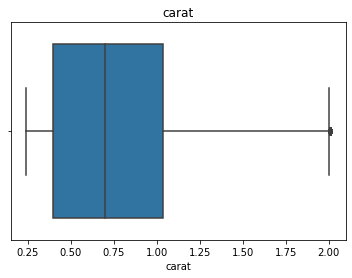

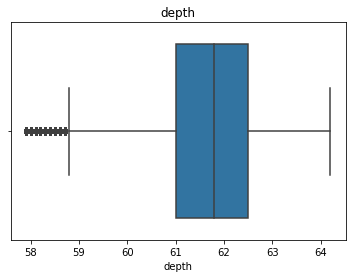

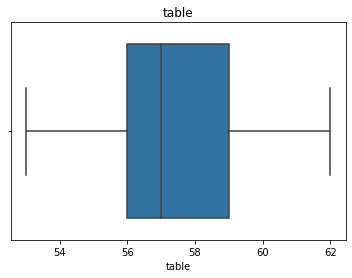

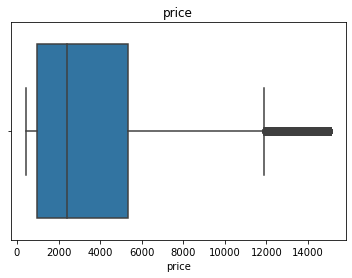

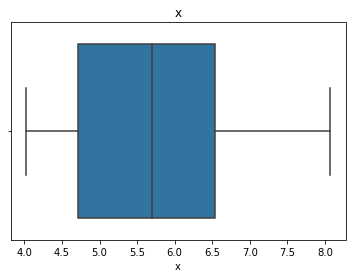

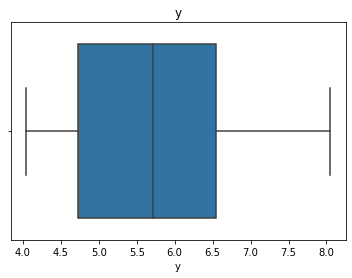

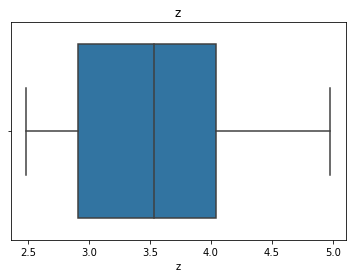

In [62]:
for i in num_cols:
    sns.boxplot(x=cd[i])
    plt.title(i)
    plt.show()

#### Inference:
1)We still have outliers in lower limit of depth so we will clip it again.<br>
2)The Dimensions having min value as 0 has been taken care by cliping

In [63]:
cd["depth"] = cd["depth"].clip(lower = cd["depth"].quantile(0.03))

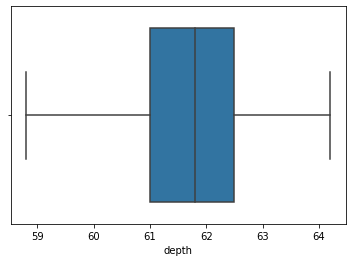

In [64]:
sns.boxplot(x=cd["depth"])
plt.show()

#### 2.Categorical Column Treatment

In [65]:
cd2 = cd.copy()

In [66]:
lb=LabelEncoder()
for i in cat_cols:
    cd[i]=lb.fit_transform(cd[i])

In [67]:
cd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,4,6,7,62.8,57.0,429.0,4.02,4.04,2.48
1,0.24,4,5,6,62.3,57.0,429.0,4.02,4.04,2.48
2,0.26,4,4,2,61.9,55.0,429.0,4.07,4.11,2.53
3,0.24,4,4,4,59.4,61.0,429.0,4.02,4.05,2.48
4,0.30,4,6,2,62.7,59.0,429.0,4.21,4.27,2.66


In [68]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int32  
 2   color    53943 non-null  int32  
 3   clarity  53943 non-null  int32  
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  float64
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 3.5 MB


In [69]:
td = cd.copy()
td.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,4,6,7,62.8,57.0,429.0,4.02,4.04,2.48
1,0.24,4,5,6,62.3,57.0,429.0,4.02,4.04,2.48
2,0.26,4,4,2,61.9,55.0,429.0,4.07,4.11,2.53
3,0.24,4,4,4,59.4,61.0,429.0,4.02,4.05,2.48
4,0.30,4,6,2,62.7,59.0,429.0,4.21,4.27,2.66


In [70]:
x = td.drop(columns = ["price"],axis = 1)
y = td['price']
print(x.shape)
print(y.shape)

(53943, 9)
(53943,)


In [71]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.24,4,6,7,62.8,57.0,4.02,4.04,2.48
1,0.24,4,5,6,62.3,57.0,4.02,4.04,2.48
2,0.26,4,4,2,61.9,55.0,4.07,4.11,2.53
3,0.24,4,4,4,59.4,61.0,4.02,4.05,2.48
4,0.30,4,6,2,62.7,59.0,4.21,4.27,2.66
...,...,...,...,...,...,...,...,...,...
53938,0.72,0,2,5,58.8,62.0,6.06,5.97,3.34
53939,0.90,0,5,4,64.2,62.0,5.83,5.79,3.99
53940,1.00,0,5,3,64.2,56.0,6.22,6.12,4.13
53941,1.04,0,3,3,64.2,57.0,6.25,6.23,4.07


#### 3.Standardisation

In [72]:
x2 = x.copy()
x2

,carat,cut,color,clarity,depth,table,x,y,z
0,0.24,4,6,7,62.8,57.0,4.02,4.04,2.48
1,0.24,4,5,6,62.3,57.0,4.02,4.04,2.48
2,0.26,4,4,2,61.9,55.0,4.07,4.11,2.53
3,0.24,4,4,4,59.4,61.0,4.02,4.05,2.48
4,0.30,4,6,2,62.7,59.0,4.21,4.27,2.66
...,...,...,...,...,...,...,...,...,...
53938,0.72,0,2,5,58.8,62.0,6.06,5.97,3.34
53939,0.90,0,5,4,64.2,62.0,5.83,5.79,3.99
53940,1.00,0,5,3,64.2,56.0,6.22,6.12,4.13
53941,1.04,0,3,3,64.2,57.0,6.25,6.23,4.07


In [76]:
sc =StandardScaler()
x2 = sc.fit_transform(x2)

#### Performance without standardization

In [77]:
OLS1=sm.add_constant(x)
reg=sm.OLS(y, OLS1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 5.668e+04
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:21:11   Log-Likelihood:            -4.5819e+05
No. Observations:               53943   AIC:                         9.164e+05
Df Residuals:                   53933   BIC:                         9.165e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.481e+04    558.171     26.528      0.0

#### Performance with Standardization

In [78]:
OLS2=sm.add_constant(x2)
reg=sm.OLS(y, OLS2).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 5.668e+04
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:21:11   Log-Likelihood:            -4.5819e+05
No. Observations:               53943   AIC:                         9.164e+05
Df Residuals:                   53933   BIC:                         9.165e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3880.5202      5.090    762.381      0.0

#### Inference:
1)The performance of model with and without standardisation is equall.But we will be using algorithms that require scaled values so we will continue with scaled values and also we now don't have multicollineiarity in data.

<b>We will perform Feature Selection On Scaled Values for that we have to change the numpy array to Data Frame.<b/>

In [79]:
sc = pd.DataFrame(x2,columns=["carat","cut","color","clarity","depth","table","x","y","z"])
sc

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.207591,1.407964,2.002193,1.835179,0.858100,-0.197446,-1.549322,-1.543870,-1.552655
1,-1.207591,1.407964,1.414328,1.255325,0.454370,-0.197446,-1.549322,-1.543870,-1.552655
2,-1.163915,1.407964,0.826463,-1.064093,0.131385,-1.154352,-1.503879,-1.479793,-1.479052
3,-1.207591,1.407964,0.826463,0.095616,-1.887267,1.716366,-1.549322,-1.534716,-1.552655
4,-1.076562,1.407964,2.002193,-1.064093,0.777354,0.759460,-1.376636,-1.333330,-1.287683
...,...,...,...,...,...,...,...,...,...
53938,-0.159360,-2.484253,-0.349266,0.675470,-2.371743,2.194819,0.304790,0.222833,-0.286680
53939,0.233727,-2.484253,1.414328,0.095616,1.988546,2.194819,0.095748,0.058062,0.670162
53940,0.452109,-2.484253,1.414328,-0.484239,1.988546,-0.675899,0.450210,0.360141,0.876251
53941,0.539461,-2.484253,0.238598,-0.484239,1.988546,-0.197446,0.477477,0.460834,0.787927


#### 4.Feature Selection

In [80]:
rf = RandomForestRegressor()
rf.fit(x2,y)

RandomForestRegressor()

In [81]:
imp=pd.DataFrame({"var":x.columns,"imp":rf.feature_importances_}).sort_values(by=["imp"],ascending=False)
imp

,var,imp
0,carat,0.657946
7,y,0.236372
3,clarity,0.064547
2,color,0.026734
8,z,0.004120
6,x,0.003342
4,depth,0.003147
5,table,0.002335
1,cut,0.001459


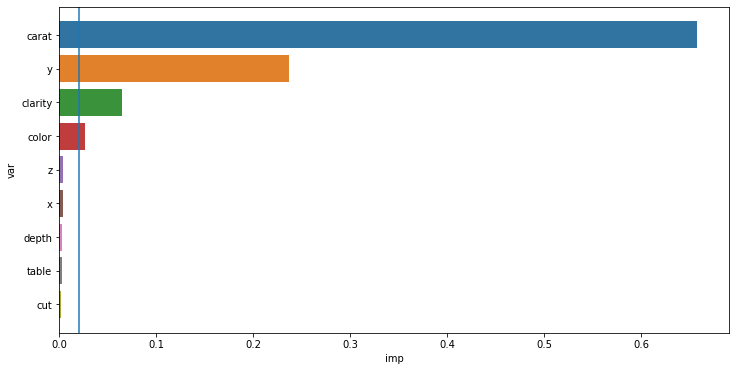

In [82]:
plt.figure(figsize = (12,6))
sns.barplot(x = "imp",y="var",data = imp)
plt.axvline(x = 0.02)
plt.plot()
plt.show()

In [83]:
selected_var=imp[imp["imp"]>=0.02]["var"].to_list()         #important variable selection so to ease in prediction
selected_var

['carat', 'y', 'clarity', 'color']

In [89]:
sv=sc[['carat', 'y', 'clarity', 'color']]
sv.shape

(53943, 4)

In [91]:
sv

,carat,y,clarity,color
0,-1.207591,-1.543870,1.835179,2.002193
1,-1.207591,-1.543870,1.255325,1.414328
2,-1.163915,-1.479793,-1.064093,0.826463
3,-1.207591,-1.534716,0.095616,0.826463
4,-1.076562,-1.333330,-1.064093,2.002193
...,...,...,...,...
53938,-0.159360,0.222833,0.675470,-0.349266
53939,0.233727,0.058062,0.095616,1.414328
53940,0.452109,0.360141,-0.484239,1.414328
53941,0.539461,0.460834,-0.484239,0.238598


In [92]:
y.shape

(53943,)

#### Performance on all the columns

In [94]:
OLS3=sm.add_constant(x2)
reg=sm.OLS(y, OLS3).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 5.668e+04
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:24:00   Log-Likelihood:            -4.5819e+05
No. Observations:               53943   AIC:                         9.164e+05
Df Residuals:                   53933   BIC:                         9.165e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3880.5202      5.090    762.381      0.0

#### Performance on Selected columns

In [95]:
OLS4=sm.add_constant(sv)
reg=sm.OLS(y, OLS4).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.185e+05
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:24:00   Log-Likelihood:            -4.5998e+05
No. Observations:               53943   AIC:                         9.200e+05
Df Residuals:                   53938   BIC:                         9.200e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3880.5202      5.262    737.484      0.0

#### Inference:
1) On Selected Columns we have a slight loss in R2 and Adj R2 Score.<br>
2) AIC score of All columns is lower than AIC score of Selected Columns.<br>
3) The F-statistic is higher of All columns than of selected columns.<br>
4) The data is less right skewed in all columns comparitve to left skewness in selected columns.<br>
5) The autocorrelation score is better in All columns than selected columns. 

<b> So based on inference we should go for all columns. <b/>

#### 5.Assumption Check

1. Data has No outliers.<br>
2. Data has No missing values.<br>
3. Data has no multicollinearity.<br>
4. Data has close to no autocorrelation.

5.Normality Test

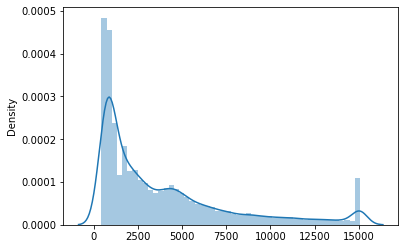

In [96]:
sns.distplot(x=cd["price"])
plt.show()

#### Inference:
-> Data is slight right skewed which is acceptable

### Model Development and Tabulation

<b>->Input Feature are in sc(standard scaled values with all columns).<br>
->Target variable is y<b/>

In [97]:
x_train,x_test,y_train,y_test=train_test_split(sc,y,test_size=0.40,
                                               random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape) 

(32365, 9)
(21578, 9)
(32365,)


<b>For model fiting and performance results we will create a function.<b/>

In [98]:
def reg_sum(model,x_train,x_test,y_train,y_test):
    import time
    initial=time.time()
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    R2_score=r2_score(y_test,ypred)
    MSE=mean_squared_error(y_test,ypred)
    RMSE=np.sqrt(mean_squared_error(y_test,ypred))
    time=time.time()-initial
    return R2_score,MSE,RMSE,time

#### 1.Linear Regression

In [99]:
lr = LinearRegression()
lr_r2,lr_MSE,lr_RMSE,lr_time=reg_sum(lr,x_train,x_test,y_train,y_test)

In [100]:
res1 = pd.DataFrame({'Model':'LinReg','R2_Score':lr_r2,'MSE':lr_MSE,'RMSE':lr_RMSE,"Time Taken":lr_time},index=[0])
res1

,Model,R2_Score,MSE,RMSE,Time Taken
0,LinReg,0.903561,1.420351e+06,1191.784683,0.039762


#### 2.Decison Tree

In [101]:
dt = DecisionTreeRegressor()
dt_r2,dt_MSE,dt_RMSE,dt_time=reg_sum(dt,x_train,x_test,y_train,y_test)

In [102]:
res2 = pd.DataFrame({'Model':'DT','R2_Score':dt_r2,'MSE':dt_MSE,'RMSE':dt_RMSE,"Time Taken":dt_time},index=[1])
res2

,Model,R2_Score,MSE,RMSE,Time Taken
1,DT,0.969219,453336.084835,673.302373,0.399962


#### 3.Decision Tree with hyper parameter tunning

In [103]:
dt = DecisionTreeRegressor()
dt_r2,dt_MSE,dt_RMSE,dt_time=reg_sum(dt,x_train,x_test,y_train,y_test)

In [104]:
dt2 = DecisionTreeRegressor()

In [105]:
params={"max_depth" :[7,9,11,13],
       "min_samples_split":[20, 50,150, 300],
       "min_samples_leaf": [5,10,15,30,40]}

In [106]:
dt_grid=GridSearchCV(estimator=dt2, param_grid=params, cv=10, n_jobs=-1,verbose=1)
dt_grid.fit(x_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 9, 11, 13],
                         'min_samples_leaf': [5, 10, 15, 30, 40],
                         'min_samples_split': [20, 50, 150, 300]},
             verbose=1)

In [107]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=20)

In [108]:
dt2 = DecisionTreeRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=20,random_state=24)

In [109]:
dt2_r2,dt2_MSE,dt2_RMSE,dt2_time=reg_sum(dt2,x_train,x_test,y_train,y_test)

In [110]:
res3 = pd.DataFrame({'Model':'dt2+HT','R2_Score':dt2_r2,'MSE':dt2_MSE,'RMSE':dt2_RMSE,"Time Taken":dt2_time},index=[2])
res3

,Model,R2_Score,MSE,RMSE,Time Taken
2,dt2+HT,0.978809,312103.550787,558.662287,0.251332


#### 4.Random Forest

In [111]:
rf = RandomForestRegressor()
rf_r2,rf_MSE,rf_RMSE,rf_time=reg_sum(rf,x_train,x_test,y_train,y_test)

In [112]:
res4 = pd.DataFrame({'Model':'rf','R2_Score':rf_r2,'MSE':rf_MSE,'RMSE':rf_RMSE,"Time Taken":rf_time},index=[3])
res4

,Model,R2_Score,MSE,RMSE,Time Taken
3,rf,0.98337,244928.443117,494.902458,24.101928


#### 5.Random Forest with parameter tunning

In [113]:
rf2 = RandomForestRegressor()

In [114]:
params = {"n_estimators":[50,75,100],
          "max_depth":[10,13,15],
          "min_samples_split":[30,50,120,150],
          "min_samples_leaf":[5,10,15,30,40]
         }

rf_grid=GridSearchCV(estimator=rf2, param_grid=params, cv=10, n_jobs=-1,verbose=1)
rf_grid.fit(x_train, y_train)
####### The Computation takes 2:00 hrs

rf_grid.best_estimator_

In [116]:
rf2 = RandomForestRegressor(max_depth=11, min_samples_leaf=5, min_samples_split=30,
                      n_estimators=75, random_state=21)
rf2_r2,rf2_MSE,rf2_RMSE,rf2_time=reg_sum(rf2,x_train,x_test,y_train,y_test)

In [117]:
res5 = pd.DataFrame({'Model':'rf+HT','R2_Score':rf2_r2,'MSE':rf2_MSE,'RMSE':rf2_RMSE,"Time Taken":rf2_time},index=[4])
res5

,Model,R2_Score,MSE,RMSE,Time Taken
4,rf+HT,0.982028,264688.924595,514.479275,9.168371


#### 6.AdaBoost

In [118]:
ab= AdaBoostRegressor()
ab_r2,ab_MSE,ab_RMSE,ab_time=reg_sum(ab,x_train,x_test,y_train,y_test)

In [120]:
res6 = pd.DataFrame({'Model':'Ada','R2_Score':ab_r2,'MSE':ab_MSE,'RMSE':ab_RMSE,"Time Taken":ab_time},index=[5])
res6

,Model,R2_Score,MSE,RMSE,Time Taken
5,Ada,0.898928,1.488592e+06,1220.078845,3.919306


#### 7.AdaBoost with parameter Tunning

In [121]:
ab2= AdaBoostRegressor(random_state=31)

In [122]:
params = {'n_estimators':[50,70,80,90],
         'base_estimator':[DecisionTreeRegressor(max_depth=50,min_samples_leaf=30),
                          DecisionTreeRegressor(max_depth=100,max_leaf_nodes=12),
                          DecisionTreeRegressor(max_depth=75),]}

ada_grid = GridSearchCV(estimator=ab2, param_grid=params,cv=15)
ada_grid.fit(x_train,y_train)
####### The Computation takes 1 hr

ada_grid.best_estimator_

In [127]:
dt3 = DecisionTreeRegressor(max_depth=50, min_samples_leaf=30)
ab2 = AdaBoostRegressor(base_estimator=dt3,n_estimators=100)
ab2_r2,ab2_MSE,ab2_RMSE,ab2_time=reg_sum(ab2,x_train,x_test,y_train,y_test)

In [128]:
res7 = pd.DataFrame({'Model':'Ada+HT','R2_Score':ab2_r2,'MSE':ab2_MSE,'RMSE':ab2_RMSE,"Time Taken":ab2_time},index=[6])
res7

,Model,R2_Score,MSE,RMSE,Time Taken
6,Ada+HT,0.981271,275841.914591,525.206545,2.015652


#### 8.XGBOOST

In [129]:
xg = XGBRegressor()
xg_r2,xg_MSE,xg_RMSE,xg_time=reg_sum(xg,x_train,x_test,y_train,y_test)

In [130]:
res8 = pd.DataFrame({'Model':'XGBoost','R2_Score':xg_r2,'MSE':xg_MSE,'RMSE':xg_RMSE,"Time Taken":xg_time},index=[7])
res8

,Model,R2_Score,MSE,RMSE,Time Taken
7,XGBoost,0.984112,233992.993693,483.728223,2.778072


#### 9.KNN

In [138]:
knn = KNeighborsRegressor(n_neighbors=41)
knn_r2,knn_MSE,knn_RMSE,knn_time=reg_sum(knn,x_train,x_test,y_train,y_test)

In [139]:
res9 = pd.DataFrame({'Model':'KNN','R2_Score':knn_r2,'MSE':knn_MSE,'RMSE':knn_RMSE,"Time Taken":knn_time},index=[8])
res9

,Model,R2_Score,MSE,RMSE,Time Taken
8,KNN,0.950808,724502.711219,851.17725,4.725839


In [140]:
result = pd.concat([res1,res2,res3,res4,res5,res6,res7,res8,res9])
result

,Model,R2_Score,MSE,RMSE,Time Taken
0,LinReg,0.903561,1.420351e+06,1191.784683,0.039762
1,DT,0.969219,4.533361e+05,673.302373,0.399962
2,dt2+HT,0.978809,3.121036e+05,558.662287,0.251332
3,rf,0.983370,2.449284e+05,494.902458,24.101928
4,rf+HT,0.982028,2.646889e+05,514.479275,9.168371
5,Ada,0.898928,1.488592e+06,1220.078845,3.919306
6,Ada+HT,0.981271,2.758419e+05,525.206545,2.015652
7,XGBoost,0.984112,2.339930e+05,483.728223,2.778072
8,KNN,0.950808,7.245027e+05,851.177250,4.725839


#### Inference:
Among all the models XGBoost has the highest R2_Score and Minimum RMSE so XGBoost is the best performing Model followed by RF.

In [141]:
result.to_csv("A:\Diamond_price_Model.csv")

### Model Deployment

In [142]:
import pickle

In [146]:
pickle.dump(xg,open('xg_model.pkl','wb'))

-------------------------------------------------------END---------------------------------------------